In [39]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import os
import time

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

In [40]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'

In [41]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [42]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [43]:
LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

SF_lat_idx = geo_idx(SF_lat, PRECT_lat)
SF_lon_idx = geo_idx(SF_lon, PRECT_lon)

OD_lat_idx = geo_idx(Oroville_dam_lat, PRECT_lat)
OD_lon_idx = geo_idx(Oroville_dam_lon, PRECT_lon)

#REGION_lat_idx, REGION_lon_idx = SF_lat_idx, SF_lon_idx; REGION_NAME = 'SF'
REGION_lat_idx, REGION_lon_idx = LA_lat_idx, LA_lon_idx; REGION_NAME = 'LA'
#REGION_lat_idx, REGION_lon_idx = OD_lat_idx, OD_lon_idx; REGION_NAME = 'OD'

In [44]:
print(LA_lat_idx, LA_lon_idx)
print(PRECT_lat[LA_lat_idx], PRECT_lon[LA_lon_idx])

9 17
34.3979057592 241.25


In [45]:
events_dict = {}

In [46]:
window=30

In [47]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [48]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

# 100yr 3season mean dry

In [49]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_period = 100
events_per_year = 1

return_val_perc = 100*(1/(return_period*events_per_year))
print(return_val_perc)





all_events_pic = numpy.load('../100yr_dry_3season_mean/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../100yr_dry_3season_mean/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../100yr_dry_3season_mean/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d.reshape((PRECT_nlat, PRECT_nlon, 40, 180))
all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))  
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events<return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])
        
        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]<return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))


1.0


/Users/baird/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1043: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [50]:
sum_all = numpy.nansum(all_events_hist_rcp_3d_reshape)
print(sum_all/40/180)

6.37555555556


In [51]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

In [52]:
events_dict['100yr_3season_dry_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['100yr_3season_dry_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['100yr_3season_dry_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['100yr_3season_pic_count'] = pic_counts_ALL_LATLON

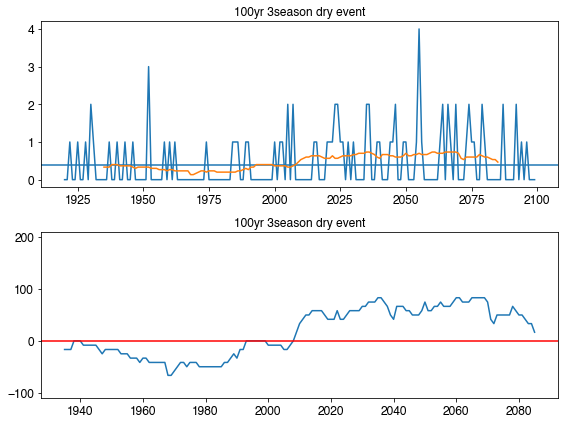

In [54]:
fontsize = 12

fig, axes = mp.subplots(2)
fig.set_size_inches(8,6)

ax = axes[0]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON[REGION_lat_idx, REGION_lon_idx])
ax.axhline(pic_counts_ALL_LATLON_equivalent[REGION_lat_idx,REGION_lon_idx])
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth[REGION_lat_idx,REGION_lon_idx])
ax.set_title('100yr 3season dry event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

ax = axes[1]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth_norm[REGION_lat_idx,REGION_lon_idx])
ax.axhline(0, c='red')
ax.set_ylim(-110, 210)
ax.set_title('100yr 3season dry event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

fig.tight_layout()

# 100yr 1season mean dry

In [55]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_period = 100
events_per_year = 1

return_val_perc = 100*(1/(return_period*events_per_year))
print(return_val_perc)





all_events_pic = numpy.load('../100yr_dry_season/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../100yr_dry_season/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../100yr_dry_season/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))        
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events<return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events<return_period_values_pic[latlon_idx,0])

        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]<return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))

1.0


In [56]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

In [57]:
events_dict['100yr_1season_dry_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['100yr_1season_dry_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['100yr_1season_dry_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['100yr_1season_pic_count'] = pic_counts_ALL_LATLON

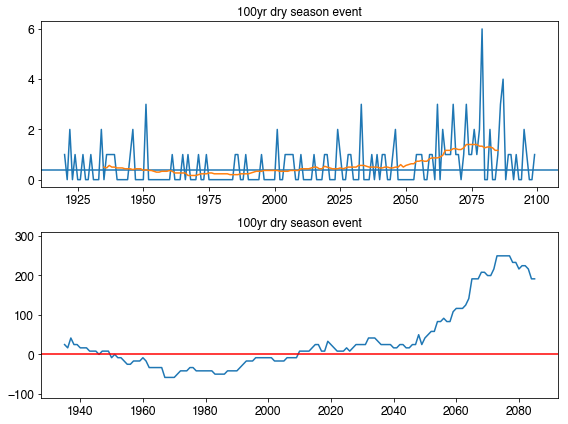

In [58]:
fontsize = 12

fig, axes = mp.subplots(2)
fig.set_size_inches(8,6)

ax = axes[0]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON[REGION_lat_idx, REGION_lon_idx])
ax.axhline(pic_counts_ALL_LATLON_equivalent[REGION_lat_idx,REGION_lon_idx])
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth[REGION_lat_idx,REGION_lon_idx])
ax.set_title('100yr dry season event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

ax = axes[1]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth_norm[REGION_lat_idx,REGION_lon_idx])
ax.axhline(0, c='red')
ax.set_ylim(-110, 310)
ax.set_title('100yr dry season event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

fig.tight_layout()

# 25yr wet events

In [59]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

return_period = 25
events_per_year = 1

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)




all_events_pic = numpy.load('../25yr_wet_season/csv_files/all_events_pic.npy')
return_period_values_pic_df = pandas.read_csv('../25yr_wet_season/csv_files/return_period_values_pic_df.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]
all_events_hist_rcp_3d = numpy.load('../25yr_wet_season/csv_files/all_events_hist_rcp_3d.npy')

all_events_hist_rcp_3d_count = numpy.zeros((all_events_hist_rcp_3d.shape))

#nlat_unique = numpy.unique(cali_coast_latlon_indices[:,0]).size
return_period_values_hist_rcp = numpy.zeros((len(latlon_indices), n_seasons_hist_rcp, 3))
#print(latitude_time_values.shape)

for yr_idx in range(n_seasons_hist_rcp):
    season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(1920,2100)]
    
    for latlon_idx in range(len(latlon_indices)):
        seasonal_events = all_events_hist_rcp_3d[latlon_idx,:,yr_idx].reshape((-1))        
        return_period_values_hist_rcp[latlon_idx,yr_idx,0] = numpy.nanpercentile(seasonal_events, return_val_perc)
        return_period_values_hist_rcp[latlon_idx,yr_idx,1] = numpy.nansum(seasonal_events>return_period_values_hist_rcp[latlon_idx,yr_idx,0])
        return_period_values_hist_rcp[latlon_idx,yr_idx,2] = numpy.nansum(seasonal_events>return_period_values_pic[latlon_idx,0])

        for ens_member in range(40):
            all_events_hist_rcp_3d_count[latlon_idx,ens_member,yr_idx] = numpy.nansum(all_events_hist_rcp_3d[latlon_idx,ens_member,yr_idx]>return_period_values_pic[latlon_idx,0])

all_events_hist_rcp_3d_reshape = all_events_hist_rcp_3d_count.reshape((PRECT_nlat, PRECT_nlon, 40, 180))



96.0


In [60]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon,-1))
pic_counts_ALL_LATLON = pic_counts_reshape[:,:]
hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

In [61]:
events_dict['25yr_1season_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['25yr_1season_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['25yr_1season_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['25yr_1season_wet_pic_count'] = pic_counts_ALL_LATLON

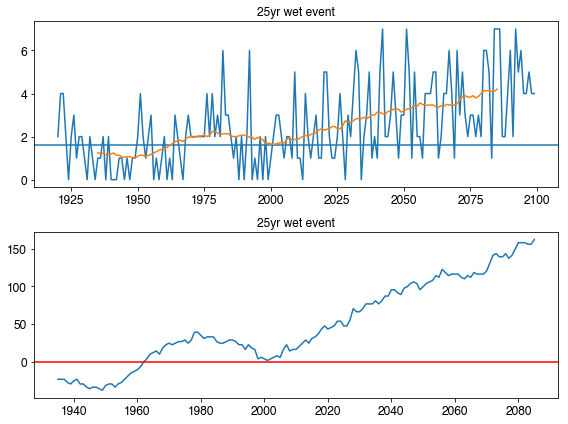

In [62]:
fontsize = 12

fig, axes = mp.subplots(2)
fig.set_size_inches(8,6)

ax = axes[0]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON[REGION_lat_idx, REGION_lon_idx])
ax.axhline(pic_counts_ALL_LATLON_equivalent[REGION_lat_idx,REGION_lon_idx])
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth[REGION_lat_idx,REGION_lon_idx,:])
ax.set_title('25yr wet event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

ax = axes[1]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth_norm[REGION_lat_idx,REGION_lon_idx,:])
ax.axhline(0, c='red')
#ax.set_ylim(-110, 210)
ax.set_title('25yr wet event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

fig.tight_layout()

# 200yr 40d wet events

In [63]:
return_period = 200
events_per_year = 151/40

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

99.86754966887416


In [64]:
print(1798*151/40-return_val_perc/100.*1798*151/40)

8.990000000000691


In [65]:
# calculate ratio of frequencies of exceedance
pic_counts = 10#return_period_values_pic[:,1]
hist_rcp_counts = numpy.load('../200yr_40d_wet_events/csv_files/event_count.npy')#return_period_values_hist_rcp[:,:,2]

#pic_counts_reshape = pic_counts.reshape((PRECT_nlat, PRECT_nlon))
hist_rcp_counts_ALL_LATLON_reshape = hist_rcp_counts.reshape((PRECT_nlat, PRECT_nlon, 40, 180))

all_events_hist_rcp_3d_reshape = numpy.copy(hist_rcp_counts_ALL_LATLON_reshape)
print(all_events_hist_rcp_3d_reshape.shape)

#hist_rcp_counts_ALL_LATLON_40members = hist_rcp_counts_2d[REGION_lat_idx,REGION_lon_idx,:,:]
hist_rcp_counts_ALL_LATLON_summed_across_40 = numpy.sum(hist_rcp_counts_ALL_LATLON_reshape[:,:,:,:], axis=2)
hist_rcp_counts_ALL_LATLON = numpy.copy(hist_rcp_counts_ALL_LATLON_summed_across_40)

pic_counts_ALL_LATLON = pic_counts*numpy.ones((PRECT_nlat,PRECT_nlon))
#hist_rcp_counts_ALL_LATLON = hist_rcp_counts_reshape[:,:,:]
hist_rcp_counts_ALL_LATLON_smooth = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))

for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth[i,j] = pandas.Series(hist_rcp_counts_ALL_LATLON[i,j,:]).rolling(window=window, center=True).mean()

pic_counts_ALL_LATLON_equivalent = pic_counts_ALL_LATLON/(1798/40)
hist_rcp_counts_ALL_LATLON_smooth_norm = numpy.zeros((hist_rcp_counts_ALL_LATLON.shape))
for i in range(PRECT_nlat):
    for j in range(PRECT_nlon):
        hist_rcp_counts_ALL_LATLON_smooth_norm[i,j,:] = (hist_rcp_counts_ALL_LATLON_smooth[i,j,:] - pic_counts_ALL_LATLON_equivalent[i,j])/pic_counts_ALL_LATLON_equivalent[i,j] * 100.

(26, 25, 40, 180)


In [66]:
events_dict['200yr_40d_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['200yr_40d_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['200yr_40d_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['200yr_40d_wet_pic_count'] = pic_counts_ALL_LATLON

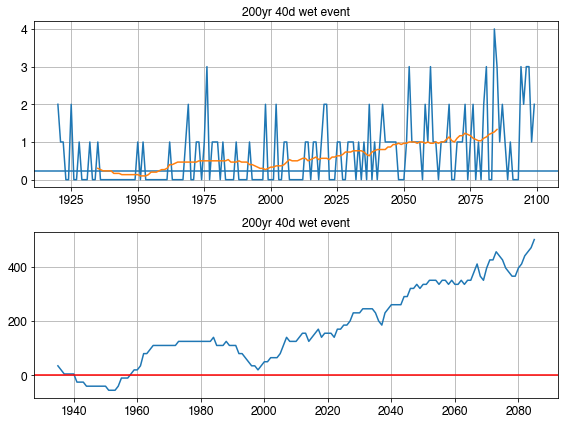

In [67]:
fontsize = 12

fig, axes = mp.subplots(2)
fig.set_size_inches(8,6)

ax = axes[0]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON[REGION_lat_idx,REGION_lon_idx])
ax.axhline(pic_counts_ALL_LATLON_equivalent[REGION_lat_idx,REGION_lon_idx])
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth[REGION_lat_idx,REGION_lon_idx,:])
ax.set_title('200yr 40d wet event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.grid()

ax = axes[1]
ax.plot(numpy.arange(1920,2100), hist_rcp_counts_ALL_LATLON_smooth_norm[REGION_lat_idx,REGION_lon_idx,:])
ax.axhline(0, c='red')
#ax.set_ylim(-110, 910)
ax.set_title('200yr 40d wet event', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.grid()

fig.tight_layout()

# Plot all together

In [68]:
print(events_dict.keys())

dict_keys(['100yr_3season_dry_all_events_40_separate_ens', '100yr_3season_dry_all_events_40_summed_30yr_avg_percent', '100yr_3season_dry_all_events_40_summed', '100yr_3season_pic_count', '100yr_1season_dry_all_events_40_separate_ens', '100yr_1season_dry_all_events_40_summed_30yr_avg_percent', '100yr_1season_dry_all_events_40_summed', '100yr_1season_pic_count', '25yr_1season_wet_all_events_40_separate_ens', '25yr_1season_wet_all_events_40_summed_30yr_avg_percent', '25yr_1season_wet_all_events_40_summed', '25yr_1season_wet_pic_count', '200yr_40d_wet_all_events_40_separate_ens', '200yr_40d_wet_all_events_40_summed_30yr_avg_percent', '200yr_40d_wet_all_events_40_summed', '200yr_40d_wet_pic_count'])


In [69]:
events_dict['200yr_40d_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
events_dict['200yr_40d_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
events_dict['200yr_40d_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
events_dict['200yr_40d_wet_pic_count'] = pic_counts_ALL_LATLON

In [70]:
print(numpy.mean(all_events_hist_rcp_3d_reshape))

0.0333194444444


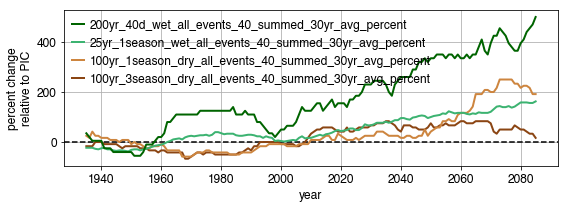

In [71]:
plot_list = ['100yr_3season_dry_all_events_40_summed_30yr_avg_percent',\
             '100yr_1season_dry_all_events_40_summed_30yr_avg_percent', \
             '25yr_1season_wet_all_events_40_summed_30yr_avg_percent', \
             '200yr_40d_wet_all_events_40_summed_30yr_avg_percent']

fontsize = 12

fig, ax = mp.subplots(1)
fig.set_size_inches(8,3)

colors = ['saddlebrown','peru','mediumseagreen','darkgreen']

ax.axhline(0, c='0', ls='--')
for i in range(len(plot_list)):
    key_string = list(events_dict.keys())[i]
    ax.plot(numpy.arange(1920,2100), events_dict[plot_list[i]][REGION_lat_idx,REGION_lon_idx,:], label=plot_list[i], c=colors[i], lw=2)

#ax.set_ylim(-90, 910)
ax.tick_params(labelsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]; labels=labels[::-1] # to reverse
legend = ax.legend(handles, labels, fontsize=fontsize, ncol=1, \
                   bbox_to_anchor=(0.01,0.96), edgecolor='None', \
                   facecolor='None', fancybox=False, \
                   bbox_transform=ax.transAxes, loc='upper left', \
                   borderaxespad=0, borderpad=0.25, handlelength=1.0, \
                   handletextpad=0.5, columnspacing=0.5, markerscale=1)

ax.set_xlabel('year', fontsize=fontsize)
ax.set_ylabel('percent change\nrelative to PIC', fontsize=fontsize)
ax.grid()

fig.tight_layout()

fig.savefig('all_events_time_series.pdf', transparent=True, bbox_inches='tight')

# Now save as a netcdf file

In [72]:
year_list = numpy.arange(1921,2101)
time_datetime = [datetime.datetime(i,1,15) for i in year_list]
time_nc = netCDF4.date2num(time_datetime, units='days since 1920-01-01', calendar='standard')

In [73]:
keys_list = list(events_dict.keys())
units_list = ['RCP+hist counts for each ens. member',\
              'percent',\
              'RCP+hist counts summed across 40 ens. members',\
              'pic counts']*4

In [74]:
print(keys_list)
print(len(keys_list))

['100yr_3season_dry_all_events_40_separate_ens', '100yr_3season_dry_all_events_40_summed_30yr_avg_percent', '100yr_3season_dry_all_events_40_summed', '100yr_3season_pic_count', '100yr_1season_dry_all_events_40_separate_ens', '100yr_1season_dry_all_events_40_summed_30yr_avg_percent', '100yr_1season_dry_all_events_40_summed', '100yr_1season_pic_count', '25yr_1season_wet_all_events_40_separate_ens', '25yr_1season_wet_all_events_40_summed_30yr_avg_percent', '25yr_1season_wet_all_events_40_summed', '25yr_1season_wet_pic_count', '200yr_40d_wet_all_events_40_separate_ens', '200yr_40d_wet_all_events_40_summed_30yr_avg_percent', '200yr_40d_wet_all_events_40_summed', '200yr_40d_wet_pic_count']
16


In [75]:
print

<function print>

In [76]:
all_events_hist_rcp_3d_reshape.shape

(26, 25, 40, 180)

In [77]:
# save hist clim
filename = 'time_series_event_counts_'+'ALL_LATLON'+'.nc'

if os.path.exists(filename):
    print('file exists')
    os.remove(filename)

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

time_dim = ncfile.createDimension('time', None)
time_var = ncfile.createVariable('time', 'f4', ('time',))
time_var[:] = time_nc
time_var.units = 'days since 1920-01-01'

lat_dim = ncfile.createDimension('lat', PRECT_nlat)
lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lat_var[:] = PRECT_lat
lat_var.units = 'degrees North'

lon_dim = ncfile.createDimension('lon', PRECT_nlon)
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lon_var[:] = PRECT_lon
lon_var.units = 'degrees East'

ens_dim = ncfile.createDimension('ensemble', len(ensemble_names))
ens_var = ncfile.createVariable('ensemble', 'f4', ('ensemble',))
ens_var[:] = ensemble_names
ens_var.units = 'NCAR LENS ensemble member'

for key in range(len(keys_list)):
    if len(events_dict[keys_list[key]].shape)==4:
        variable = ncfile.createVariable(keys_list[key], 'f4', ('time', 'ensemble', 'lat', 'lon'), fill_value=numpy.nan)
        reorder_data = events_dict[keys_list[key]].transpose([3,2,0,1])
        variable[:] = reorder_data
    if len(events_dict[keys_list[key]].shape)==3:
        variable = ncfile.createVariable(keys_list[key], 'f4', ('time', 'lat', 'lon'), fill_value=numpy.nan)
        reorder_data = events_dict[keys_list[key]].transpose([2,0,1])
        variable[:] = reorder_data
    elif len(events_dict[keys_list[key]].shape)==2:
        variable = ncfile.createVariable(keys_list[key], 'f4', ('lat', 'lon',), fill_value=numpy.nan)
        variable[:] = events_dict[keys_list[key]]
    variable.units = units_list[key]

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

file exists
time_series_event_counts_ALL_LATLON.nc saved


In [78]:
print(events_dict.keys())

dict_keys(['100yr_3season_dry_all_events_40_separate_ens', '100yr_3season_dry_all_events_40_summed_30yr_avg_percent', '100yr_3season_dry_all_events_40_summed', '100yr_3season_pic_count', '100yr_1season_dry_all_events_40_separate_ens', '100yr_1season_dry_all_events_40_summed_30yr_avg_percent', '100yr_1season_dry_all_events_40_summed', '100yr_1season_pic_count', '25yr_1season_wet_all_events_40_separate_ens', '25yr_1season_wet_all_events_40_summed_30yr_avg_percent', '25yr_1season_wet_all_events_40_summed', '25yr_1season_wet_pic_count', '200yr_40d_wet_all_events_40_separate_ens', '200yr_40d_wet_all_events_40_summed_30yr_avg_percent', '200yr_40d_wet_all_events_40_summed', '200yr_40d_wet_pic_count'])


In [79]:
#events_dict['200yr_40d_wet_all_events_40_separate_ens'] = all_events_hist_rcp_3d_reshape
#events_dict['200yr_40d_wet_all_events_40_summed_30yr_avg_percent'] = hist_rcp_counts_ALL_LATLON_smooth_norm
#events_dict['200yr_40d_wet_all_events_40_summed'] = hist_rcp_counts_ALL_LATLON
#events_dict['200yr_40d_wet_pic_count'] = pic_counts_ALL_LATLON